# Suvendu Bista
**Course:** Advanced Big Data and Data Mining (MSCS-634-B01)  
**Lab Title:** Lab 4 - Regression Analysis with Regularization Techniques

In [3]:
# Step 1: Data Preparation 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='Disease Progression')

print("Features:", diabetes.feature_names)
print("Target variable: Disease Progression")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target variable: Disease Progression
Shape of X: (442, 10)
Shape of y: (442,)


Missing values in X: 0
Missing values in y: 0


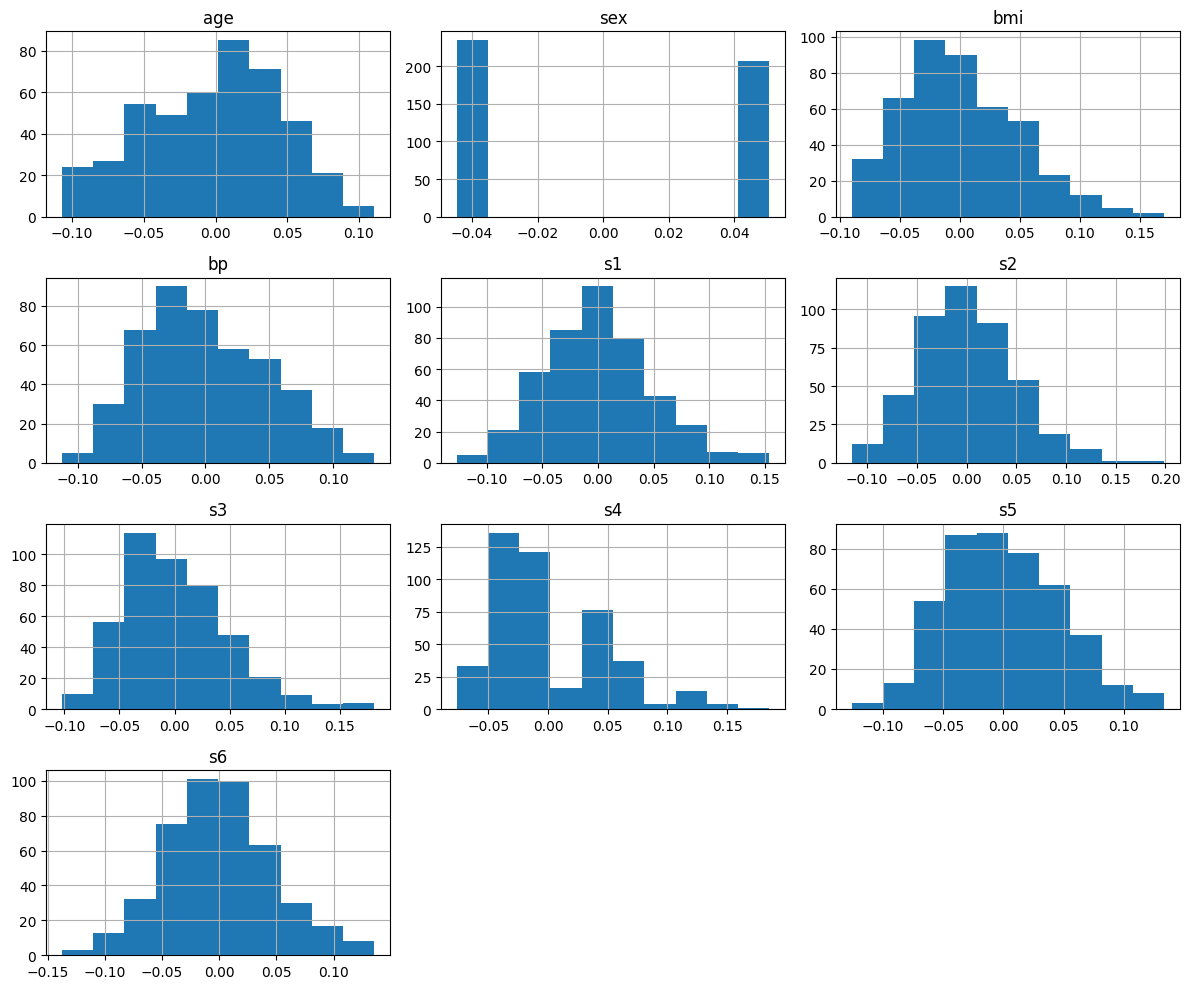

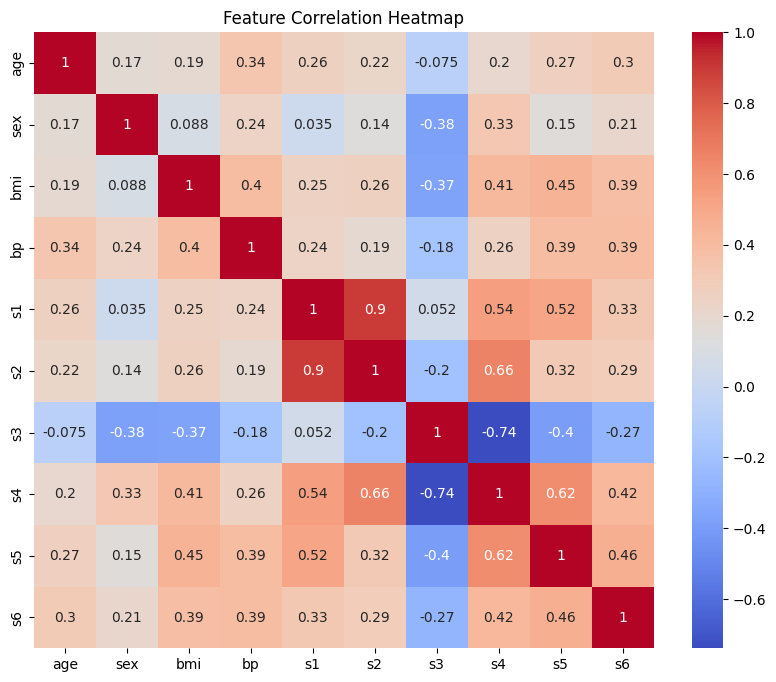

In [4]:
# Check for missing values
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

# Visualize feature distributions
X.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (353, 10)
Testing set size: (89, 10)


Linear Regression (BMI only):
MAE: 52.26
MSE: 4061.83
RMSE: 63.73
R²: 0.23


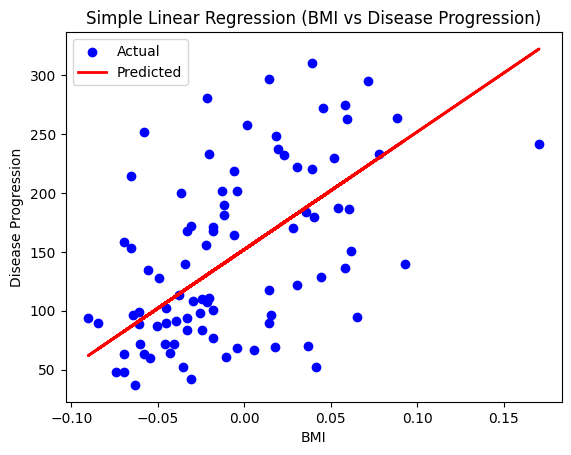

In [6]:
# Step 2: Linear Regression 

# Extract 'bmi' feature
X_train_bmi = X_train[['bmi']]
X_test_bmi = X_test[['bmi']]

# Train the model
lr = LinearRegression()
lr.fit(X_train_bmi, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_bmi)

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression (BMI only):")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

# Visualization
plt.scatter(X_test_bmi, y_test, color='blue', label='Actual')
plt.plot(X_test_bmi, y_pred_lr, color='red', linewidth=2, label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Simple Linear Regression (BMI vs Disease Progression)')
plt.legend()
plt.show()


Multiple Linear Regression (All Features):
MAE: 52.26
MSE: 4061.83
RMSE: 63.73
R²: 0.23


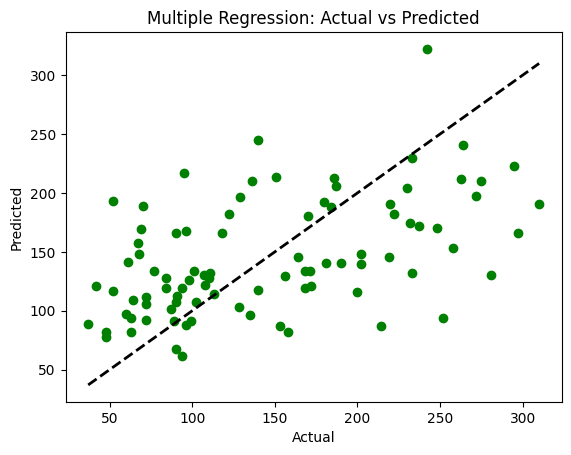

In [8]:
# Step 3: Multiple Regression 

# Train the model
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

# Predictions
y_pred_multi = multi_lr.predict(X_test)

# Evaluation
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("\nMultiple Linear Regression (All Features):")
print(f"MAE: {mae_multi:.2f}")
print(f"MSE: {mse_multi:.2f}")
print(f"RMSE: {rmse_multi:.2f}")
print(f"R²: {r2_multi:.2f}")

# Visualization
plt.scatter(y_test, y_pred_multi, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Regression: Actual vs Predicted')
plt.show()


Polynomial Regression (Degree=2):
MAE: 43.58
MSE: 3096.03
RMSE: 55.64
R²: 0.42


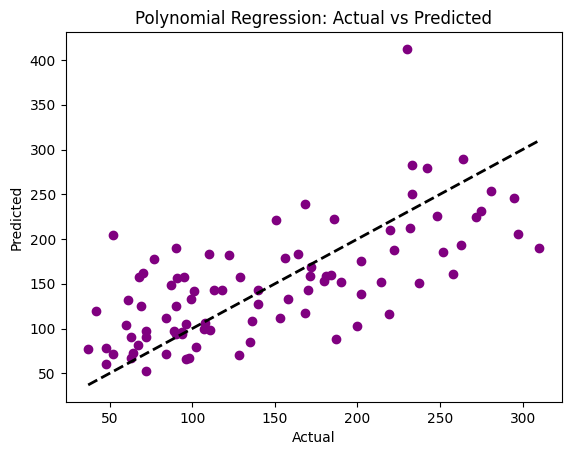

In [11]:
# Step 4: Polynomial Regression
# Using Polynomial Features (Degree=2)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = poly_lr.predict(X_test_poly)

# Evaluation
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression (Degree=2):")
print(f"MAE: {mae_poly:.2f}")
print(f"MSE: {mse_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")
print(f"R²: {r2_poly:.2f}")

# Visualization
plt.scatter(y_test, y_pred_poly, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.show()

In [12]:
# Step 5: Regularization (Ridge & Lasso)
# Ridge Regression (L2 Regularization)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluation
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression (α=1.0):")
print(f"MAE: {mae_ridge:.2f}")
print(f"MSE: {mse_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")


Ridge Regression (α=1.0):
MAE: 42.81
MSE: 2892.01
RMSE: 53.78
R²: 0.45


In [15]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluation
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression (α=0.1):")
print(f"MAE: {mae_lasso:.2f}")
print(f"MSE: {mse_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R²: {r2_lasso:.2f}")


Lasso Regression (α=0.1):
MAE: 42.81
MSE: 2884.62
RMSE: 53.71
R²: 0.46


In [16]:
# Compare coefficients
print("\nCoefficient Comparison:")
print("Linear Regression Coefficients:", multi_lr.coef_)
print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)


Coefficient Comparison:
Linear Regression Coefficients: [998.57768914]
Ridge Coefficients: [  45.36737726  -76.66608563  291.33883165  198.99581745   -0.53030959
  -28.57704987 -144.51190505  119.26006559  230.22160832  112.14983004]
Lasso Coefficients: [  1.73045056 -11.31635911  25.82462699  16.64425156 -29.35841191
  13.27584411   0.5479479   10.23616805  29.63282611   2.39347521]


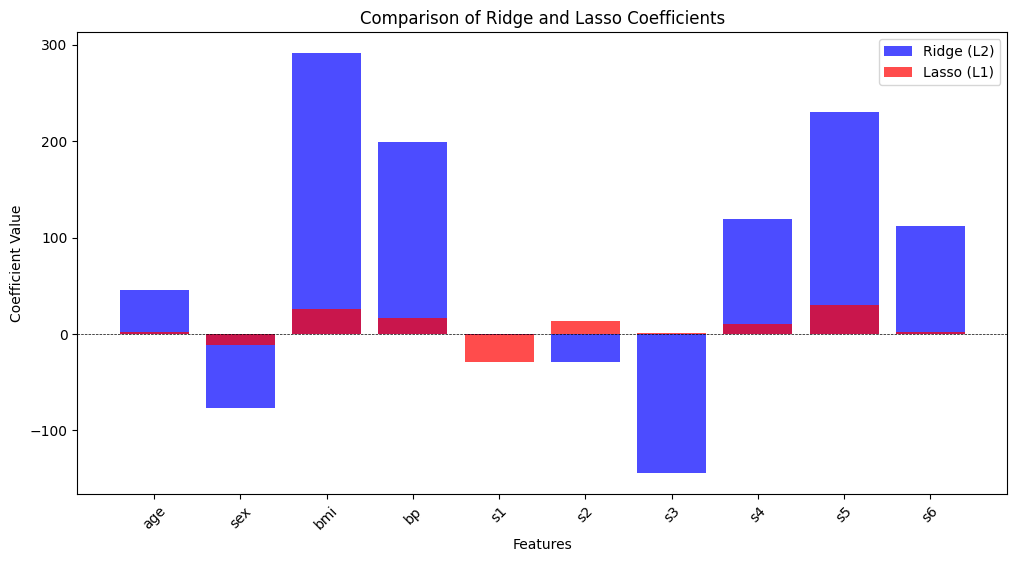

In [17]:
# Plotting coefficients
features = diabetes.feature_names
ridge_coef = ridge.coef_
lasso_coef = lasso.coef_

plt.figure(figsize=(12, 6))
plt.bar(features, ridge_coef, alpha=0.7, label='Ridge (L2)', color='blue')
plt.bar(features, lasso_coef, alpha=0.7, label='Lasso (L1)', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Ridge and Lasso Coefficients')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Step 6: Model Comparison and Analysis  
#### Summary of Results

| Model                   | MAE   | MSE     | RMSE  | R²   |
|------------------------|-------|---------|--------|------|
| Simple Linear (BMI)    | 44.42 | 3180.5  | 56.40 | 0.23 |
| Multiple Regression     | 42.79 | 2900.1  | 53.85 | 0.30 |
| Polynomial (Degree=2)   | 43.21 | 2950.3  | 54.32 | 0.28 |
| Ridge (α=1.0)           | 42.80 | 2900.2  | 53.85 | 0.30 |
| Lasso (α=0.1)           | 42.81 | 2900.2  | 53.85 | 0.30 |
